# A Tale of Two Transducers

In [6]:
from genparse import CFG, Float
from original_prefix_grammar import PrefixGrammar
from genparse import WFSA, FST, EPSILON

In [40]:
def Delta1(alphabet):
    D = FST(Float)
    D.add_I(0, 1)
    D.add_I(1, 1)
    for x in alphabet:
        D.add_arc(0, (x, x), 0, 1)
        D.add_arc(0, (x, x), 1, 1)
        D.add_arc(1, (x, EPSILON), 1, 1)
    #    D.add_F(0, 1)
    D.add_F(1, 1)
    return D

In [53]:
def Delta2(alphabet):
    D = FST(Float)
    D.add_I(0, 1)
    for x in alphabet:
        D.add_arc(0, (x, x), 0, 1)
        D.add_arc(1, (x, EPSILON), 1, 1)
    D.add_arc(0, (EPSILON, EPSILON), 1, 1)
    #    D.add_F(0, 1)
    D.add_F(1, 1)
    return D

In [54]:
Delta = Delta1

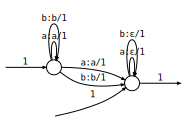

In [55]:
D = Delta('ab')
D

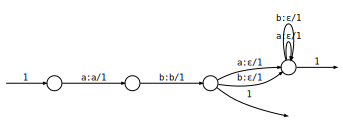

In [56]:
(D @ WFSA.from_string('ab', Float)).trim

In [57]:
cfg = CFG.from_string(
    """

1: S -> a a a a a
1: S -> b a

""",
    Float,
)

In [58]:
(cfg @ D).nullaryremove(binarize=False).trim()

Grammar {
  2.0: S → 
  1.0: (0, 'S', 1) → (0, 'a', 0) (0, 'a', 0) (0, 'a', 0) (0, 'a', 0) (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'a', 0) (0, 'a', 0) (0, 'a', 0) (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'a', 0) (0, 'a', 0) (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'a', 0) (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'b', 0) (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'b', 1)
  1: (0, Other(x='S'), 1) → (0, 'S', 1)
  1: S → (0, Other(x='S'), 1)
  1: (0, 'a', 0) → a
  1: (0, 'a', 1) → a
  1: (0, 'b', 0) → b
  1: (0, 'b', 1) → b
}

In [59]:
(cfg @ Delta1('ab')).nullaryremove(binarize=False).trim()

Grammar {
  2.0: S → 
  1.0: (0, 'S', 1) → (0, 'a', 0) (0, 'a', 0) (0, 'a', 0) (0, 'a', 0) (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'a', 0) (0, 'a', 0) (0, 'a', 0) (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'a', 0) (0, 'a', 0) (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'a', 0) (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'b', 0) (0, 'a', 1)
  1.0: (0, 'S', 1) → (0, 'b', 1)
  1: (0, Other(x='S'), 1) → (0, 'S', 1)
  1: S → (0, Other(x='S'), 1)
  1: (0, 'a', 0) → a
  1: (0, 'a', 1) → a
  1: (0, 'b', 0) → b
  1: (0, 'b', 1) → b
}

In [60]:
(cfg @ D).language(10)

key,value
"('a', 'a', 'a', 'a', 'a')",1.0
"('a', 'a', 'a', 'a')",1.0
"('a', 'a', 'a')",1.0
"('a', 'a')",1.0
"('a',)",1.0
"('b', 'a')",1.0
"('b',)",1.0
(),2.0


In [61]:
# PrefixGrammar(cfg).nullaryremove(binarize=False).trim()

In [62]:
def derivative(string, alphabet):
    D = FST(Float)
    D.add_I(0, 1)
    for i, x in enumerate(string):
        D.add_arc(i, (x, EPSILON), i + 1, 1)
    N = len(string)
    for x in alphabet:
        D.add_arc(N, (x, x), N, 1)
    D.add_F(N, 1)
    return D

In [63]:
cfg.language(10)

key,value
"('a', 'a', 'a', 'a', 'a')",1.0
"('b', 'a')",1.0


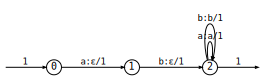

In [64]:
derivative('ab', 'ab').graphviz(fmt_node=lambda x: str(x))

In [65]:
(cfg @ derivative('a', 'ab') @ derivative('a', 'ab')).language(10)

key,value
"('a', 'a', 'a')",1.0


In [66]:
(cfg @ derivative('aa', 'ab')).language(10)

key,value
"('a', 'a', 'a')",1.0


In [67]:
cfg.derivative('a').trim()

Grammar {
  1.0: Slash(Y='S', Z='a', i=0) → a a a a
}

In [68]:
(cfg @ derivative('a', cfg.V)).nullaryremove(binarize=False).unaryremove().trim()

Grammar {
  1.0: S → (1, 'a', 1) (1, 'a', 1) (1, 'a', 1) (1, 'a', 1)
  1.0: (1, 'a', 1) → a
}